## <span style="font-family:Microsoft JhengHei;">[決策樹 Decision Tree](https://scikit-learn.org/stable/modules/tree.html)</span>

* <font size = 3.5 face = 'Microsoft JhengHei'>[Classification (本次介紹)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)<font>
* [Regression](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

### <span style="font-family:Microsoft JhengHei;">[結構](https://www.researchgate.net/figure/Basic-structure-of-a-decision-tree-All-decision-trees-are-built-through-recursion_fig3_295860754)</span>

<img class="public-figure-details__img" src="https://www.researchgate.net/profile/Mei-Hung_Chiu/publication/295860754/figure/fig3/AS:333010919542789@1456407398669/Basic-structure-of-a-decision-tree-All-decision-trees-are-built-through-recursion.png" alt="Basic structure of a decision tree. All decision trees are built through recursion. Decision trees are also not built upon various assumptions, such as normal distribution; collinearity or correlation between explanatory variables can also be ignored. &nbsp;" height="500" width="400" itemprop="contentUrl">

### <span style="font-family:Microsoft JhengHei;">資料</span>
| ID | 性別 | 年齡 | 學歷 | 是否違約 |
|:------:|:--------:|:------------:|:-----------:|:-------:|

* <span style="font-family:Microsoft JhengHei;font-size:16px;">__屬性__：
 1. 性別
 2. 年齡
 3. 學歷
</span>


* <span style="font-family:Microsoft JhengHei;font-size:16px;">__目標__：是否違約</span>

## <span style="font-family:Microsoft JhengHei;">決策樹依據何屬性分類?</span>
><span style="font-family:Microsoft JhengHei;font-size:16px;">利用屬性選擇指標找出資料值組最適之屬性</span>

## <span style="font-family:Microsoft JhengHei;">屬性選擇指標(Impurity 不純度)</span>
<span style="font-family:Microsoft JhengHei;font-size:16px;">目的：分割出的資料越純粹(pure)越好，即不純度越低越好</span>

有兩種資料

| ID | 性別 | 年齡 | 學歷 | 是否違約 |
|:------:|:--------:|:------------:|:-----------:|:-------:|
| 1 | 女 | 22 | 大學 | 否 |
| 2 | 男 | 24 | 大學 | 否 |
| 3 | 男 | 35 | 大學 | 是 |
| 4 | 女 | 31 | 大學 | 否 |
| 5 | 女 | 27 | 大學 | 否 |
| 6 | 男 | 25 | 碩士 | 是 |
| 7 | 男 | 23 | 高中 | 是 |
| 8 | 女 | 35 | 碩士 | 否 |
| 9 | 女 | 26 | 高中 | 否 |
| 10 | 男 | 36 | 碩士 | 否 |

$$ p_{k} = \frac{1}{N} \sum_{x_i \in R}^{} I(y_i = k)$$

<span style="font-family:Microsoft JhengHei;font-size:16px;">以上資料集有10筆(N=10)無遺失值之資料，假設第一層(m = 1)用__性別__屬性來切割資料：</span>
<br><span style="font-family:Microsoft JhengHei;font-size:16px;">__性別__屬性有2類別(k = 男,女)，其中有5個男和5個女，因此性別為男和性別為女的機率分別為</span></br>
$$ P_{男} = \frac{1}{10} \sum_{x_i \in R_{性別}}^{} I(y_i = 男) =  \frac{1}{10} \times 5 = 0.5 $$
$$ P_{女} = \frac{1}{10} \sum_{x_i \in R_{性別}}^{} I(y_i = 女) =  \frac{1}{10} \times 5 = 0.5 $$

<span style="font-family:Microsoft JhengHei;font-size:16px;">若改用學歷屬性來切割資料：</span>
<br><span style="font-family:Microsoft JhengHei;font-size:16px;">__學歷__屬性有3類別(k = 高中,大學,碩士)，其中有2個高中、5個大學和3個碩士，因此__學歷__為高中、大學、碩士的機率分別為</span></br>
$$ P_{高中} = \frac{1}{10} \sum_{x_i \in R_{學歷}}^{} I(y_i = 高中) =  \frac{1}{10} \times 2 = 0.2 $$
$$ P_{大學} = \frac{1}{10} \sum_{x_i \in R_{學歷}}^{} I(y_i = 大學) =  \frac{1}{10} \times 5 = 0.5 $$
$$ P_{碩士} = \frac{1}{10} \sum_{x_i \in R_{學歷}}^{} I(y_i = 碩士) =  \frac{1}{10} \times 3 = 0.3 $$

### <span style="font-family:Microsoft JhengHei;">1. Information Gain 又叫Entropy(熵) -- ID3、C4.5、C5.0</span>
<span style="font-family:Microsoft JhengHei;font-size:16px;">$$ H(X_m) = - \sum_{k}^{}p_{mk} log(p_{mk}) $$</span>

<span style="font-family:Microsoft JhengHei;font-size:16px;">$$ X_m：第m個node的訓練資料 $$</span>

<span style="font-family:Microsoft JhengHei;">以概似函數的型態來解讀的話，可看成機率函數為$f(x)={p_x}^{p_x}$的對數概似函數，過程如下：</span>

設$X_1,X_2,…,X_n \stackrel{iid}{\sim} f(x_i;p)$，
$$ L(p) = \prod_{i=1}^{n} f(x_i;p) = \prod_{i=1}^{n} {p_{x_i}}^{p_{x_i}} $$
取log，
$$ l(p)=\sum_{i=1}^{n} log⁡({p_{x_i}}^{p_{x_i}}) =\sum_{i=1}^{n} p_{x_i} log⁡(p_{x_i}) $$

<span style="font-family:Microsoft JhengHei;">概似函數越大越好，又熵的定義有加負號，因此熵的值越小越好。</span>

<span style="font-family:Microsoft JhengHei;">將兩資料用性別分類：</span>
 + <span style="font-family:Microsoft JhengHei;">資料一：違約機率0.5、不違約機率0.5</span>
      <br>$ Entropy=-0.5 \times log⁡0.5 - 0.5 \times log⁡0.5 = 0.3010 $</br>
      
   * <span style="font-family:Microsoft JhengHei;">女生節點：違約機率0、不違約機率1</span>
        <br>$ Entropy=-0 \times log⁡0 - 1 \times log⁡1 = 0 $</br>
        
   * <span style="font-family:Microsoft JhengHei;">男生節點：違約機率1、不違約機率0</span>
        <br>$ Entropy=-1 \times log1 - 0 \times log0 = 0 $</br>
        
    <span style="font-family:Microsoft JhengHei;">__將兩者加權後之$Entropy=0 \times \frac{5}{10} + 0 \times \frac{5}{10} = 0$__</span>
    
    
 + <span style="font-family:Microsoft JhengHei;">資料二：違約機率0.5、不違約機率0.5</span>
      <br>$ Entropy=-0.5 \times log⁡0.5 - 0.5 \times log⁡0.5 = 0.3010 $</br>
      
	* <span style="font-family:Microsoft JhengHei;">女生節點：違約機率$\frac{4}{9}$、不違約機率$\frac{5}{9}$</span>
        <br>$Entropy =-\frac{4}{9} log⁡(\frac{4}{9}) - \frac{5}{9} log⁡(\frac{5}{9}) = 0.2983$</br>
        
	* <span style="font-family:Microsoft JhengHei;">男生節點：違約機率0、不違約機率1</span>
        <br>$ Entropy=-0 \times log⁡0 - 1 \times log⁡1 = 0 $</br>

     <span style="font-family:Microsoft JhengHei;">__將兩者加權後之$Entropy=0.2983 \times \frac{9}{10} + 0 \times \frac{1}{10}=0.2685$__</span>
     
     
<span style="font-family:Microsoft JhengHei;">經過計算，資料一用性別來分類後，Entropy下降100%，而資料二只下降了11%，因此資料一使用性別來分類之效果較資料二好，和直觀相同。</span>


### <span style="font-family:Microsoft JhengHei;">2. Gini Index (吉尼係數 , Impurity) -- CART(Classification and Regression Trees) </span>
<span style="font-family:Microsoft JhengHei;font-size:16px;">$$ H(X_m) = \sum_{k}^{} p_{mk} (1-p_{mk}) $$</span>

<span style="font-family:Microsoft JhengHei;">吉尼係數為經濟學上代表財富分布狀態的係數，定義如下：</span>

<img height="200" alt="" width="300" src="http://kmfile.funddj.com/WikiFiles/206d3a06-e87d-4e87-b82d-7fbaf574895d/吉尼係數.gif">

<span style="font-family:Microsoft JhengHei;font-size:10px;">資料來源：https://www.moneydj.com/kmdj/wiki/wikiviewer.aspx?keyid=454b04df-3a35-494c-ac90-4c3a2af9b995</span>

<span style="font-family:Microsoft JhengHei;">若應用於訊息理論則可解釋為訊息分布的集中度，當值越小表示資料為同一類之機率越大，因此吉尼係數越小越好。</span>

<span style="font-family:Microsoft JhengHei;">將兩資料用性別分類：</span>
 + <span style="font-family:Microsoft JhengHei;">資料一：違約機率0.5、不違約機率0.5</span>
      <br>$ Gini = -0.5 \times (1 - ⁡0.5) - 0.5 \times (1 - ⁡0.5) = 0.5 $</br>
      
   * <span style="font-family:Microsoft JhengHei;">女生節點：違約機率0、不違約機率1</span>
        <br>$ Gini = -0 \times (1 - ⁡0) - 1 \times (1 - ⁡1) = 0 $</br>
        
   * <span style="font-family:Microsoft JhengHei;">男生節點：違約機率1、不違約機率0</span>
        <br>$ Gini = -1 \times (1 - ⁡1) - 0 \times (1 - ⁡0) = 0 $</br>
        
    <span style="font-family:Microsoft JhengHei;">__將兩者加權後之$ Gini = 0 \times \frac{5}{10} + 0 \times \frac{5}{10} = 0 $__</span>
    
    
 + <span style="font-family:Microsoft JhengHei;">資料二：違約機率0.5、不違約機率0.5</span>
      <br>$ Gini = -0.5 \times (1 - ⁡0.5) - 0.5 \times (1 - ⁡0.5) = 0.5 $</br>
      
	* <span style="font-family:Microsoft JhengHei;">女生節點：違約機率$ \frac{4}{9}$、不違約機率$\frac{5}{9} $</span>
        <br>$ Gini =-\frac{4}{9} \times (1 - \frac{4}{9}) - \frac{5}{9} \times (1 - \frac{5}{9}) = 0.4938 $</br>
        
	* <span style="font-family:Microsoft JhengHei;">男生節點：違約機率0、不違約機率1</span>
        <br>$ Gini = -0 \times (1 - ⁡0) - 1 \times (1 - ⁡1) = 0 $</br>

     <span style="font-family:Microsoft JhengHei;">__將兩者加權後之$ Gini = 0.4938 \times \frac{9}{10} + 0 \times \frac{1}{10} = 0.4444 $__</span>
     
     
<span style="font-family:Microsoft JhengHei;">經過計算，資料一用性別來分類後，Gini下降100%，而資料二也只下降了11%，因此資料一使用性別來分類之效果較資料二好，和直觀相同。</span>

### <span style="font-family:Microsoft JhengHei;">3. Misclassification (分組錯誤機率)</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">鑑別(差別)性分組錯誤(differential misclassification) --> 分到每組的機率($P_{mk}$)相同</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">非鑑別(差別)性分組錯誤(non-differential misclassification) --> 分到每組的機率($P_{mk}$)不同</span></br>

<span style="font-family:Microsoft JhengHei;font-size:16px;">$$ H(X_m) = 1 - max(p_{mk}) $$</span>

<span style="font-family:Microsoft JhengHei;font-size:18px;">從公式直接看可知，當同一類的機率越大，則分布越趨於同一類。</span>

<span style="font-family:Microsoft JhengHei;">將兩資料用性別分類：</span>
 + <span style="font-family:Microsoft JhengHei;">資料一：違約機率0.5、不違約機率0.5</span>
      <br>$ Misclassification = 1 - max(0.5 , 0.5) = 0.5 $</br>
      
   * <span style="font-family:Microsoft JhengHei;">女生節點：違約機率0、不違約機率1</span>
        <br>$ Misclassification = 1 - max(0 , 1) = 0 $</br>
        
   * <span style="font-family:Microsoft JhengHei;">男生節點：違約機率1、不違約機率0</span>
        <br>$ Misclassification = 1 - max(1 , 0) = 0 $</br>
        
    <span style="font-family:Microsoft JhengHei;">__將兩者加權後之$ Misclassification = 0 \times \frac{5}{10} + 0 \times \frac{5}{10} = 0 $__</span>
    
    
 + <span style="font-family:Microsoft JhengHei;">資料二：違約機率0.5、不違約機率0.5</span>
      <br>$ Misclassification = 1 - max(0.5 , 0.5) = 0.5 $</br>
      
	* <span style="font-family:Microsoft JhengHei;">女生節點：違約機率$ \frac{4}{9}$、不違約機率$\frac{5}{9} $</span>
        <br>$ Misclassification = 1 - max(\frac{4}{9} , \frac{5}{9}) = 0.4444 $</br>
        
	* <span style="font-family:Microsoft JhengHei;">男生節點：違約機率0、不違約機率1</span>
        <br>$ Misclassification = 1 - max(0 , 1) = 0 $</br>

     <span style="font-family:Microsoft JhengHei;">__將兩者加權後之$ Misclassification = 0.4444 \times \frac{9}{10} + 0 \times \frac{1}{10} = 0.4 $__</span>
     
     
<span style="font-family:Microsoft JhengHei;">經過計算，資料一用性別來分類後，Misclassification下降100%，而資料二只下降了20%，因此資料一使用性別來分類之效果較資料二好，和直觀相同。</span>

## <span style="font-family:Microsoft JhengHei;">不同資料類型之處理</span>

### <span style="font-family:Microsoft JhengHei;">1. 名目資料 -- 性別</span>

<img src="1.PNG" style="float: left;" height="100" width="200">

### <span style="font-family:Microsoft JhengHei;">2. 順序資料 -- 學歷</span>

<img src="2.PNG" style="float: left;" height="650" width="650">

### <span style="font-family:Microsoft JhengHei;">3. 連續資料 -- 年齡</span>

<img src="3.PNG" style="float: left;" height="500" width="500">

### <span style="font-family:Microsoft JhengHei;">停止分割節點條件：</span>

<span style="font-family:Microsoft JhengHei;font-size:16px;">1. 分割出的葉節點皆為同一類型即停止(缺點：容易overfitting)。</span>

<span style="font-family:Microsoft JhengHei;font-size:16px;"><span style="font-family:Microsoft JhengHei;font-size:16px;">2. 當分割出的資料樣本數小於某值即停止。</span>

<span style="font-family:Microsoft JhengHei;font-size:16px;">3. 設定Impurity小於某數即停止。</span>

## <span style="font-family:Microsoft JhengHei;">層數與overfitting</span>

<img src="4.PNG" height="500" width="500">

<span style="font-family:Microsoft JhengHei;font-size:10px;">資料來源：https://scikit-learn.org/stable/modules/tree.html</span>

## [Scikit-Learn] [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [1]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

* <span style="font-family:Microsoft JhengHei;font-size:16px;">class_weight 設定權重</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">criterion 設定屬性選擇指標 {'gini' , 'entropy'}</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">max_depth 設定最大層數 {int}</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">max_features 設定最大特徵數 {int , float , auto , sqrt , log2 , None}</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">max_leaf_nodes 設定最大葉節點數 {int , None}</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">min_impurity_decrease 若impurity低於此值則分割 {float}</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">min_impurity_split 設定最小impurity值 {float}</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">min_samples_leaf 設定葉節點最小樣本數 {int , float}</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">min_samples_split 設定分割最小樣本數 {int , float}</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">min_weight_fraction_leaf 設定葉節點最低權重</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">presort 是否重新排序可更快找到最佳分割點 {'True' , 'False'}</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">random_state 設定亂數種子</span>
* <span style="font-family:Microsoft JhengHei;font-size:16px;">splitter 設定分割方法 {'best' , 'random'}</span>

In [2]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

np.random.seed(123)

In [3]:
data = load_iris()

target = 'species'

database = pd.DataFrame(data.data , columns = list(data.feature_names))

database[target] = data.target

database.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = database.drop(target , axis = 1)
y = database[target]

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = test_size)

# decision tree
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## <span style="font-family:Microsoft JhengHei;">畫出決策樹</span>

<span style="font-family:Microsoft JhengHei;font-size:16px;">使用 [`graphviz`](https://www.graphviz.org/) 套件：conda install python-graphviz</span>

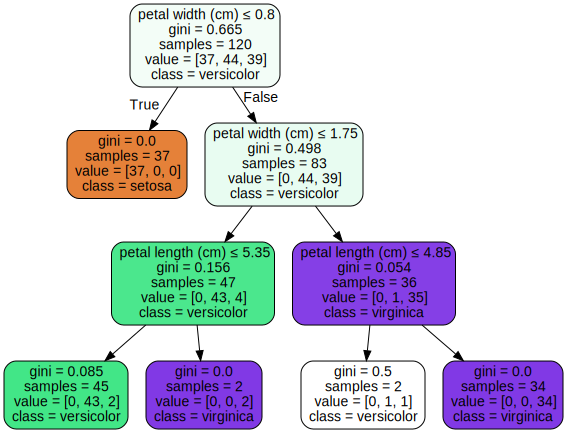

In [6]:
import graphviz

treeplot = tree.export_graphviz(model , out_file = None, 
                          feature_names = data.feature_names,  
                          class_names = data.target_names,  
                          filled = True, rounded = True,  
                          special_characters = True)

graph = graphviz.Source(treeplot)
graph

### Attributes

In [7]:
model.feature_importances_

array([0.      , 0.      , 0.059249, 0.940751])

In [8]:
n_nodes = model.tree_.node_count
n_nodes

9

In [9]:
threshold = model.tree_.threshold
threshold

array([ 0.80000001, -2.        ,  1.75      ,  5.3499999 , -2.        ,
       -2.        ,  4.85000014, -2.        , -2.        ])

In [10]:
model.tree_

### <span style="font-family:Microsoft JhengHei;">抓出每個node的條件</span>

In [11]:
model.tree_.feature

array([ 3, -2,  3,  2, -2, -2,  2, -2, -2])

In [12]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
for index , item in enumerate(model.tree_.feature):
    if item != -2:
        print('node' , index , 'condition:' , data.feature_names[model.tree_.feature[index]] ,'<=' , threshold[index])

node 0 condition: petal width (cm) <= 0.800000011920929
node 2 condition: petal width (cm) <= 1.75
node 3 condition: petal length (cm) <= 5.349999904632568
node 6 condition: petal length (cm) <= 4.8500001430511475


### <span style="font-family:Microsoft JhengHei;">查看決策的路徑</span>

In [15]:
node_indicator = model.decision_path(X_test)
node_indicator

<30x9 sparse matrix of type '<class 'numpy.int64'>'
	with 94 stored elements in Compressed Sparse Row format>

[Compressed Sparse Row format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)

In [16]:
node_indicator.todense()[0]

matrix([[1, 0, 1, 1, 1, 0, 0, 0, 0]])

In [17]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [18]:
tree_to_code(model , data.feature_names)

def tree(sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)):
  if petal width (cm) <= 0.800000011920929:
    return [[37.  0.  0.]]
  else:  # if petal width (cm) > 0.800000011920929
    if petal width (cm) <= 1.75:
      if petal length (cm) <= 5.349999904632568:
        return [[ 0. 43.  2.]]
      else:  # if petal length (cm) > 5.349999904632568
        return [[0. 0. 2.]]
    else:  # if petal width (cm) > 1.75
      if petal length (cm) <= 4.8500001430511475:
        return [[0. 1. 1.]]
      else:  # if petal length (cm) > 4.8500001430511475
        return [[ 0.  0. 34.]]


## <span style="font-family:Microsoft JhengHei;">不同類型資料處理方式</span>

In [23]:
file = 'dataset.csv'
data = pd.read_csv(file , index_col = 0 , engine = 'python')
data

,性別,年齡,學歷,居住地,是否違約
ID,,,,,
1,女,22,大學,台北市,否
2,男,24,大學,新北市,否
3,男,35,大學,桃園市,是
4,女,31,大學,新北市,否
5,女,27,大學,桃園市,否
6,男,25,碩士,新北市,是
7,男,23,高中,台北市,是
8,女,35,碩士,台北市,否
9,女,26,高中,台北市,否


In [24]:
target = '是否違約'

y = data[target]
y

ID
1     否
2     否
3     是
4     否
5     否
6     是
7     是
8     否
9     否
10    否
Name: 是否違約, dtype: object

In [25]:
X = data.drop(target , axis = 1)
X

,性別,年齡,學歷,居住地
ID,,,,
1,女,22,大學,台北市
2,男,24,大學,新北市
3,男,35,大學,桃園市
4,女,31,大學,新北市
5,女,27,大學,桃園市
6,男,25,碩士,新北市
7,男,23,高中,台北市
8,女,35,碩士,台北市
9,女,26,高中,台北市


### <span style="font-family:Microsoft JhengHei;">資料未處理直接使用決策樹分類</span>

In [26]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = test_size)

# decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

ValueError: could not convert string to float: '女'

In [27]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

### <span style="font-family:Microsoft JhengHei;">處理資料</span>
<span style="font-family:Microsoft JhengHei;font-size:16px;">二元類別資料 -- 性別</span>
<span style="font-family:Microsoft JhengHei;">__把男轉成1,女轉成0__</span>

In [28]:
display(X)
X['性別'] = list(map(lambda x : 1 if x == '男' else 0 , X['性別']))
display(X)

,性別,年齡,學歷,居住地
ID,,,,
1,女,22,大學,台北市
2,男,24,大學,新北市
3,男,35,大學,桃園市
4,女,31,大學,新北市
5,女,27,大學,桃園市
6,男,25,碩士,新北市
7,男,23,高中,台北市
8,女,35,碩士,台北市
9,女,26,高中,台北市


,性別,年齡,學歷,居住地
ID,,,,
1,0,22,大學,台北市
2,1,24,大學,新北市
3,1,35,大學,桃園市
4,0,31,大學,新北市
5,0,27,大學,桃園市
6,1,25,碩士,新北市
7,1,23,高中,台北市
8,0,35,碩士,台北市
9,0,26,高中,台北市


<span style="font-family:Microsoft JhengHei;font-size:16px;">三元順序資料 -- 學歷</span>
<span style="font-family:Microsoft JhengHei;">__把高中轉成0,大學轉成1,碩士轉成2__</span>

In [29]:
display(X)
X['學歷'] = list(map(lambda x : 0 if x == '高中' else (1 if x == '大學' else 2) , X['學歷']))
display(X)

,性別,年齡,學歷,居住地
ID,,,,
1,0,22,大學,台北市
2,1,24,大學,新北市
3,1,35,大學,桃園市
4,0,31,大學,新北市
5,0,27,大學,桃園市
6,1,25,碩士,新北市
7,1,23,高中,台北市
8,0,35,碩士,台北市
9,0,26,高中,台北市


,性別,年齡,學歷,居住地
ID,,,,
1,0,22,1,台北市
2,1,24,1,新北市
3,1,35,1,桃園市
4,0,31,1,新北市
5,0,27,1,桃園市
6,1,25,2,新北市
7,1,23,0,台北市
8,0,35,2,台北市
9,0,26,0,台北市


<span style="font-family:Microsoft JhengHei;font-size:16px;">三元類別資料 -- 居住地</span>
<span style="font-family:Microsoft JhengHei;">__把台北市、新北市、桃園市轉成虛擬變數__</span>

<span style="font-family:Microsoft JhengHei;">使用[`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)來生成</span>

In [30]:
display(X)
X = pd.get_dummies(X , prefix = ['居住地'])
display(X)

,性別,年齡,學歷,居住地
ID,,,,
1,0,22,1,台北市
2,1,24,1,新北市
3,1,35,1,桃園市
4,0,31,1,新北市
5,0,27,1,桃園市
6,1,25,2,新北市
7,1,23,0,台北市
8,0,35,2,台北市
9,0,26,0,台北市


,性別,年齡,學歷,居住地_台北市,居住地_新北市,居住地_桃園市
ID,,,,,,
1,0,22,1,1,0,0
2,1,24,1,0,1,0
3,1,35,1,0,0,1
4,0,31,1,0,1,0
5,0,27,1,0,0,1
6,1,25,2,0,1,0
7,1,23,0,1,0,0
8,0,35,2,1,0,0
9,0,26,0,1,0,0


## <span style="font-family:Microsoft JhengHei;">使用決策樹分類</span>

In [31]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = test_size)

# decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<span style="font-family:Microsoft JhengHei;color:#DE3B25;">__注意：此時target(y)的資料還是字串__</span>

In [32]:
X.columns

Index(['性別', '年齡', '學歷', '居住地_台北市', '居住地_新北市', '居住地_桃園市'], dtype='object')

In [33]:
model.classes_

array(['否', '是'], dtype=object)

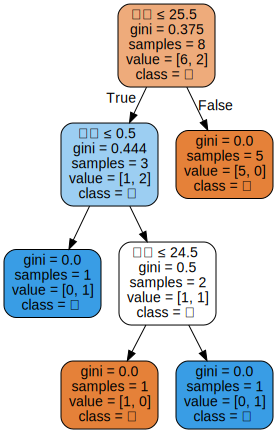

In [34]:
treeplot = tree.export_graphviz(model , out_file = None, 
                          feature_names = X.columns,  
                          class_names = model.classes_,  
                          filled = True, rounded = True,  
                          special_characters = True)

graph = graphviz.Source(treeplot)
graph

In [35]:
tree_to_code(model , X.columns)

def tree(性別, 年齡, 學歷, 居住地_台北市, 居住地_新北市, 居住地_桃園市):
  if 年齡 <= 25.5:
    if 學歷 <= 0.5:
      return [[0. 1.]]
    else:  # if 學歷 > 0.5
      if 年齡 <= 24.5:
        return [[1. 0.]]
      else:  # if 年齡 > 24.5
        return [[0. 1.]]
  else:  # if 年齡 > 25.5
    return [[5. 0.]]


In [36]:
model.feature_importances_

array([0.        , 0.88888889, 0.11111111, 0.        , 0.        ,
       0.        ])

In [37]:
n_nodes = model.tree_.node_count
n_nodes

7

In [38]:
threshold = model.tree_.threshold
threshold

array([25.5,  0.5, -2. , 24.5, -2. , -2. , -2. ])

In [39]:
model.tree_.feature

array([ 1,  2, -2,  1, -2, -2, -2])

In [40]:
X.columns

Index(['性別', '年齡', '學歷', '居住地_台北市', '居住地_新北市', '居住地_桃園市'], dtype='object')

In [41]:
for index , item in enumerate(model.tree_.feature):
    if item != -2:
        print('node' , index , 'condition:' , X.columns[model.tree_.feature[index]] ,'<=' , threshold[index])

node 0 condition: 年齡 <= 25.5
node 1 condition: 學歷 <= 0.5
node 3 condition: 年齡 <= 24.5


In [42]:
model.decision_path(X_test).todense()

matrix([[1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 1, 0, 0]])

In [43]:
model.apply(X_test)

array([6, 4])

In [44]:
model.predict(X_test)

array(['否', '否'], dtype=object)

In [45]:
model.predict([[1, 1, 0, 0, 0, 0],])

array(['是'], dtype=object)